In [ ]:
# baixar o arquivo da livraria no proprio ficheiro, priemiro simbolo

# unzip 'library.zip'
unzip("library2.zip")

# muda o diretorio da library
.libPaths("library")

# K-means

Vamos aprender a utulizar a ferramenta de agrupamento K-means

para maiores informações:[Kmeans](https://www.tidymodels.org/learn/statistics/k-means/)

In [ ]:
# pacotes necessarios
library(funModeling)
library(tidymodels)
library(tidyverse)
library(factoextra) # pacote para visualisar o kmeans

Vamos aplicar kmeans aos dados das flores iris.

In [ ]:
# conjunto de dados iris
data(iris)

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
describe(iris)

iris 

 5  Variables      150  Observations
--------------------------------------------------------------------------------
Sepal.Length 
       n  missing distinct     Info     Mean  pMedian      Gmd      .05 
     150        0       35    0.998    5.843      5.8   0.9462    4.600 
     .10      .25      .50      .75      .90      .95 
   4.800    5.100    5.800    6.400    6.900    7.255 

lowest : 4.3 4.4 4.5 4.6 4.7, highest: 7.3 7.4 7.6 7.7 7.9
--------------------------------------------------------------------------------
Sepal.Width 
       n  missing distinct     Info     Mean  pMedian      Gmd      .05 
     150        0       23    0.992    3.057     3.05   0.4872    2.345 
     .10      .25      .50      .75      .90      .95 
   2.500    2.800    3.000    3.300    3.610    3.800 

lowest : 2   2.2 2.3 2.4 2.5, highest: 3.9 4   4.1 4.2 4.4
--------------------------------------------------------------------------------
Petal.Length 
       n  missing distinct     Info     

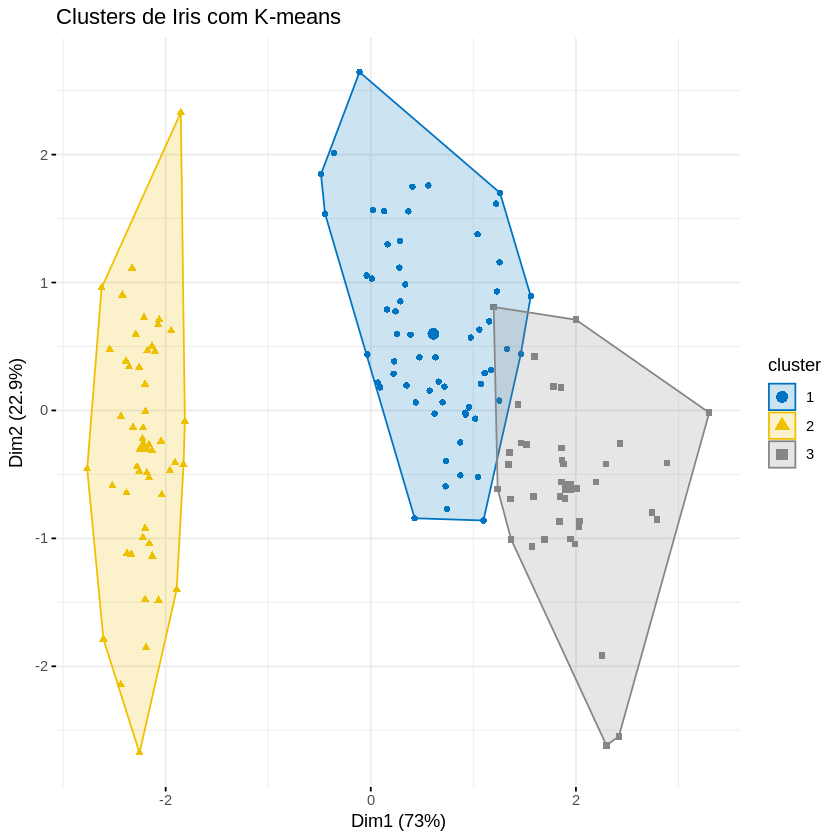

In [ ]:
# Remover a coluna Species para fazer clustering apenas com as variáveis numéricas
iris_data = iris[, -5]



# k-means ao conjunto de dados (3 clusters)
set.seed(24) # Para garantir reprodutibilidade
kmeans_result = kmeans(iris_data, centers = 3, nstart = 20)

# Visualiza os clusters utilizando factoextra
fviz_cluster(kmeans_result, data = iris_data,
             geom = "point",
             ellipse=T,
             palette = "jco",
             ggtheme = theme_minimal(),
             main = "Clusters de Iris com K-means")

Note que ele utiliza as PCA para termos a possibilidade de visualisação (visto que temos 4 dimenções)

In [ ]:
kmeans_result

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Note que temos:

numero de elementos em cada cluster (gostariamos de 50/50/50 neste caso)

os valores medios de cada variavel para cada cluster (quanto mais distancia (relativa) entre as medias de cada varaivel, melhor).

Quanto maior a pocentagem (between_SS / total_SS) melhor.

Mas como podemos definir qual o melhor numero de grupos.
Para este fim temos uma tecnica chamada de cotovelo (elbone)
onde escolhemos os numeros e cluster quando a diferença na melhora dos agrupamento **começa** a não ser representativa.

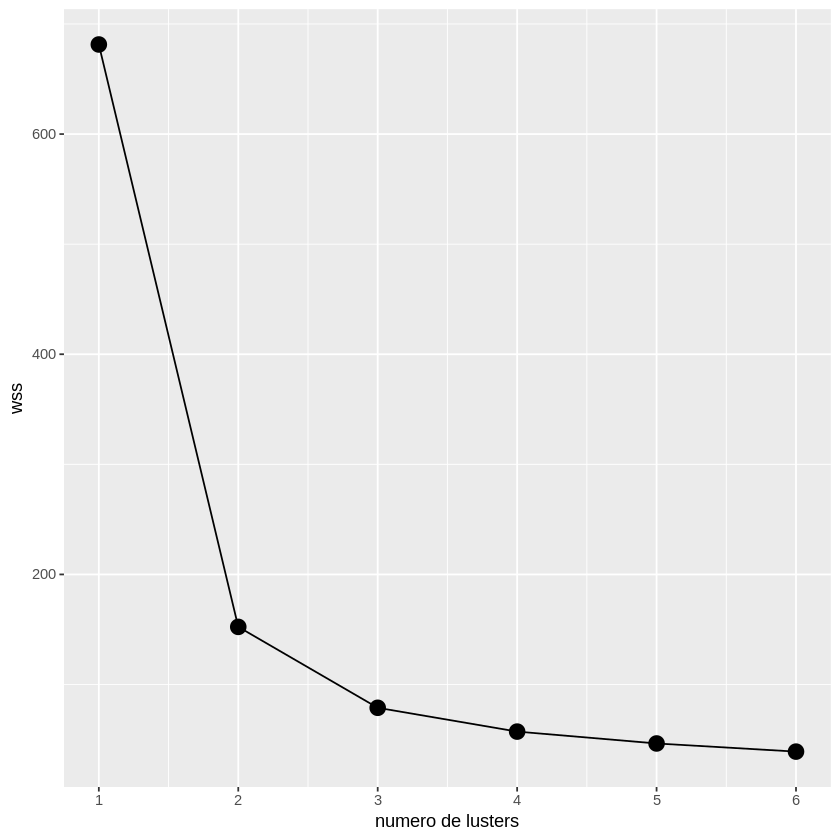

In [ ]:
# ate quanto agrupamentos iremos testar
n=6

# criar a varaivel soma do quadrados dos erros
wss= numeric(n)


# vamos gerar as interações
for (i in 1:n) {
  # Fit do model
  km.out = kmeans(iris_data, centers = i, nstart = 20)
  # definir o valor do somatorio do quadrado dos erros para cada interação
  wss[i] = km.out$tot.withinss

}

# defini o dataframe
wss_df = tibble(clusters = 1:n, wss = wss)

scree_plot = ggplot(wss_df, aes(x = clusters, y = wss, group = 1)) +
    geom_point(size = 4)+
    geom_line() +
    scale_x_continuous(breaks = c(1:n)) +
    xlab('numero de clusters')
scree_plot

Neste grafico podemos observar que começa a ficar sem representividade a diminuição interna da variabilidade dos cluster com k = 3.

Agora vamos ver se conseguimos melhorar esse resultado fazendo uma AED, para utilizar apenas 2 variaveis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


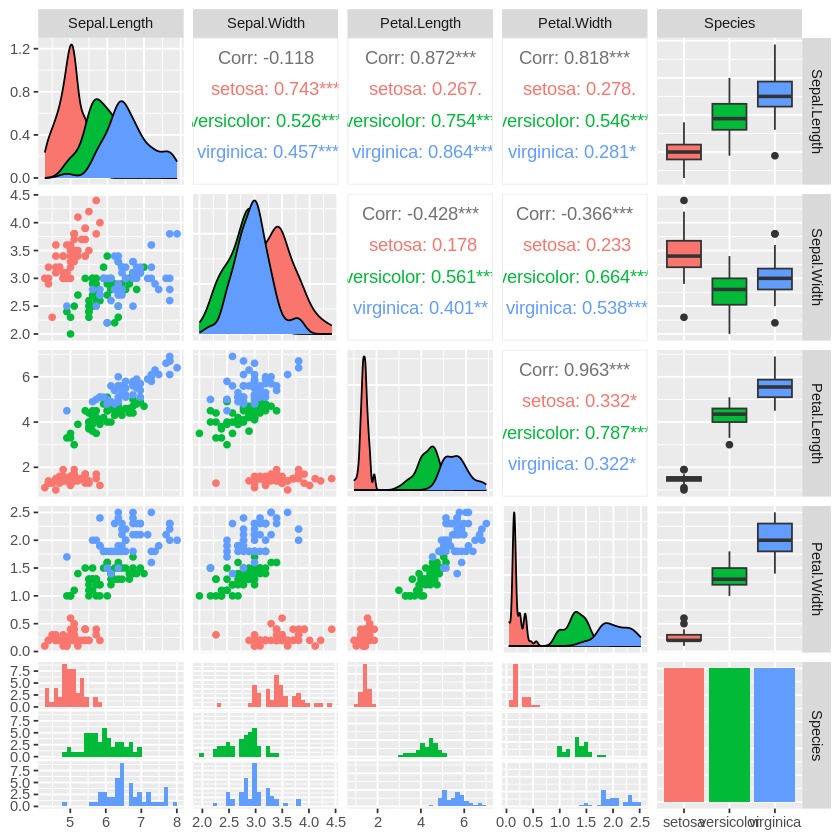

In [ ]:
#install.packages("GGally")

options(warn = -1)# para usprimir os avisos

GGally::ggpairs(iris,ggplot2::aes(color = Species))

Vamos utilizar apenas Petal.Length	Petal.Width.

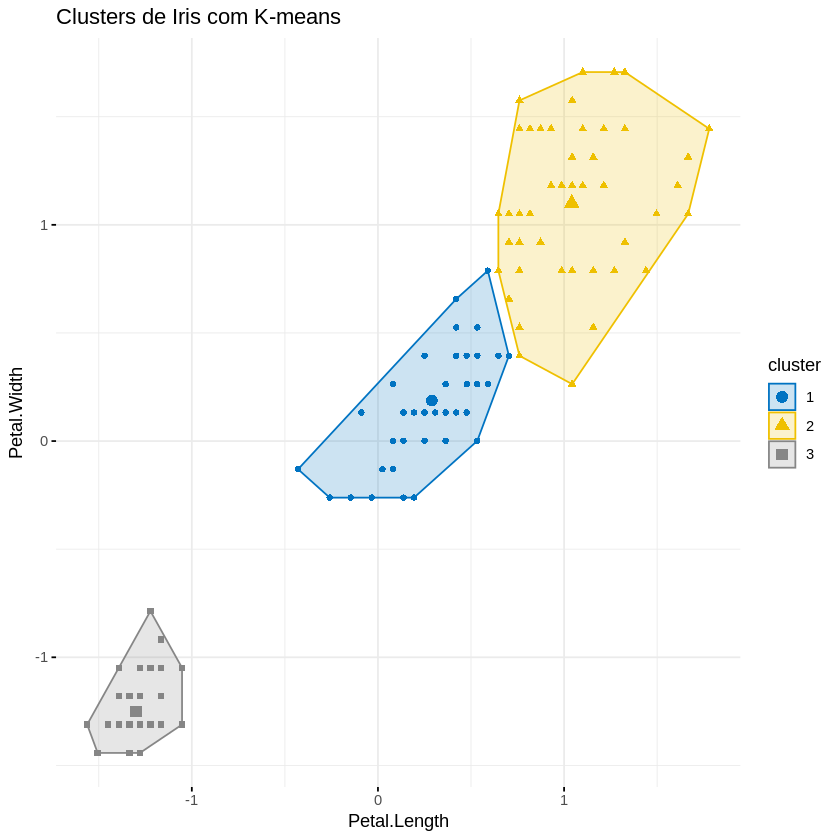

In [ ]:
# Remover a coluna Species para fazer clustering apenas com as variáveis numéricas
#iris_data = iris[, c(-1,-2,-5)]
iris_data= iris %>% select(Petal.Length,Petal.Width	)



# Aplicar k-means ao conjunto de dados (3 clusters)
set.seed(123) # Para garantir reprodutibilidade
kmeans_result <- kmeans(iris_data, centers = 3, nstart = 25)

# Visualizar os clusters utilizando factoextra
fviz_cluster(kmeans_result, data = iris_data,
             geom = "point",
             ellipse=T,
             palette = "jco",
             ggtheme = theme_minimal(),
             main = "Clusters de Iris com K-means")

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

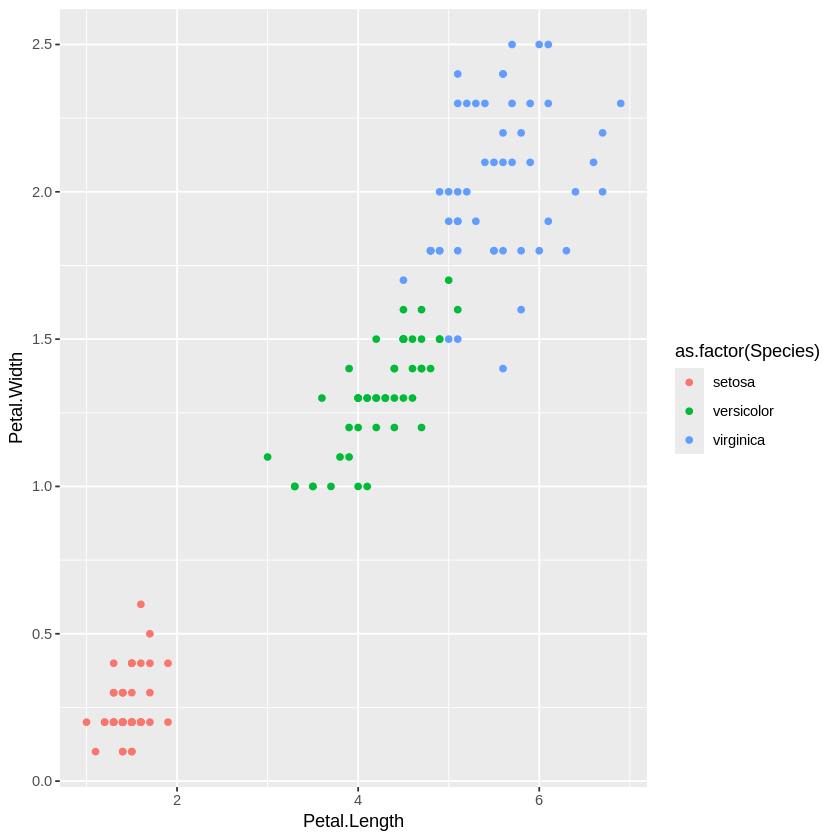

In [ ]:
ggplot(data=iris,aes(x=Petal.Length,y=Petal.Width,color=as.factor(Species)))+
  geom_point()

kmeans_result

VAmos testar agora com o mtcars

In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


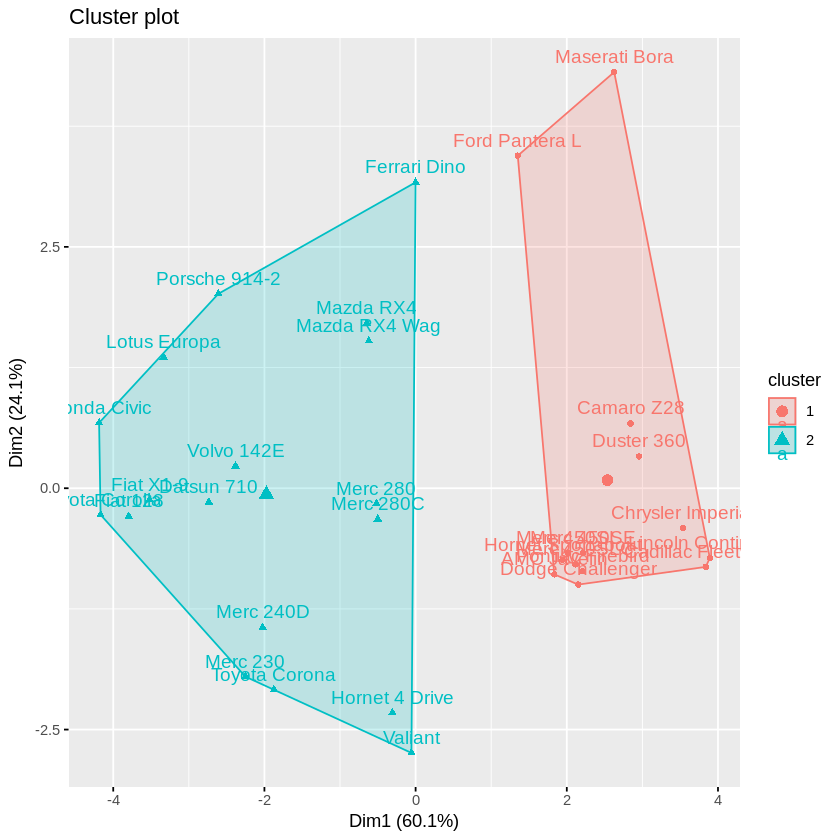

In [ ]:
kmeans_result <- kmeans(mtcars, centers = 2, nstart = 20)

# Visualizar os clusters utilizando factoextra
fviz_cluster(kmeans_result, data = mtcars)

In [ ]:
kmeans_result

K-means clustering with 2 clusters of sizes 14, 18

Cluster means:
       mpg      cyl     disp        hp     drat       wt     qsec        vs
1 15.10000 8.000000 353.1000 209.21429 3.229286 3.999214 16.77214 0.0000000
2 23.97222 4.777778 135.5389  98.05556 3.882222 2.609056 18.68611 0.7777778
         am     gear     carb
1 0.1428571 3.285714 3.500000
2 0.6111111 4.000000 2.277778

Clustering vector:
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  2                   2                   2                   2 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  1                   2                   1                   2 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  2                   2                   2                   1 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  1         

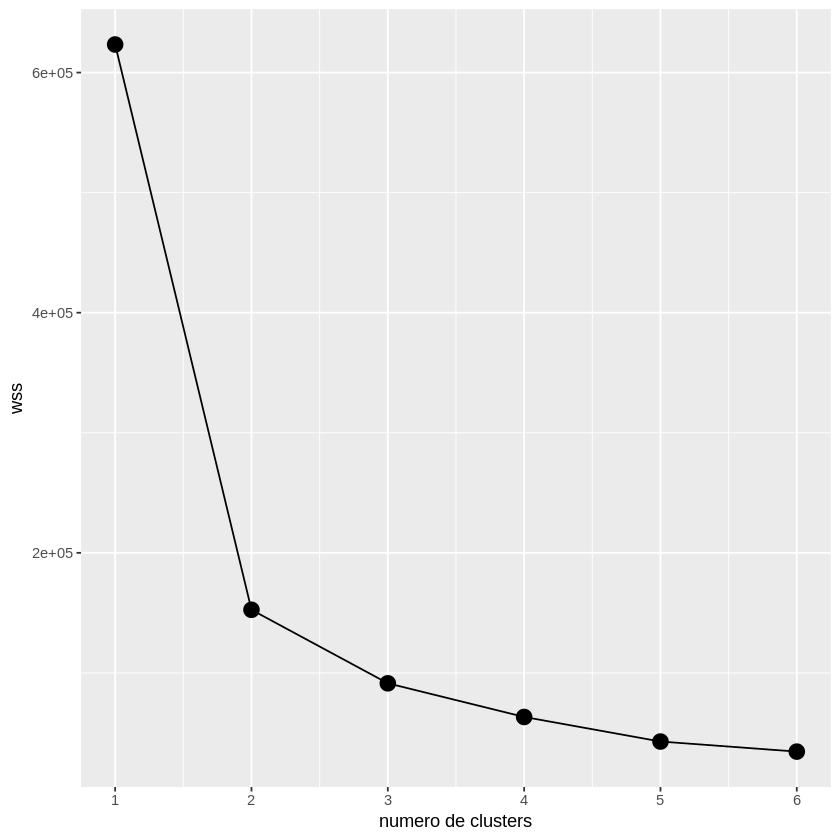

In [ ]:
# ate quanto agrupamentos iremos testar
n=6

# criar a varaivel soma do quadrados dos erros
wss= numeric(n)


# vamos gerar as interações
for (i in 1:n) {
  # Fit do model
  km.out = kmeans(mtcars, centers = i, nstart = 20)
  # definir o valor do somatorio do quadrado dos erros para cada interação
  wss[i] = km.out$tot.withinss

}

# defini o dataframe
wss_df = tibble(clusters = 1:n, wss = wss)

scree_plot = ggplot(wss_df, aes(x = clusters, y = wss, group = 1)) +
    geom_point(size = 4)+
    geom_line() +
    scale_x_continuous(breaks = c(1:n)) +
    xlab('numero de clusters')
scree_plot

Vamos ver se conseguimos agrupar corretamente o carros pelos numeros de cilindros

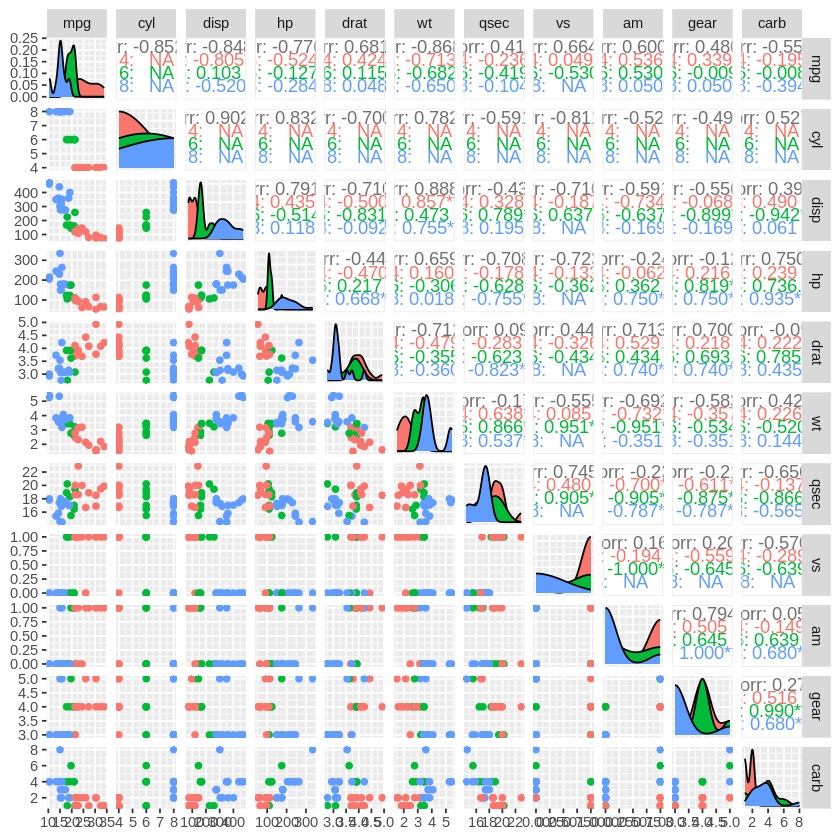

In [ ]:


GGally::ggpairs(mtcars,ggplot2::aes(color = as_factor(cyl)))

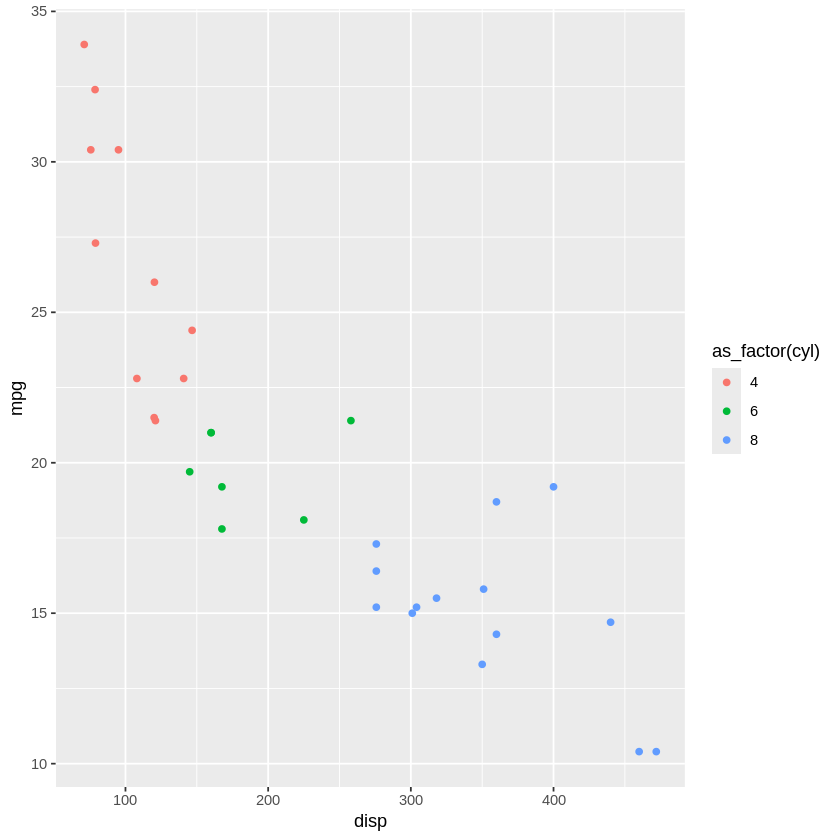

In [ ]:
ggplot(data = mtcars, aes(x = disp, y = mpg,color=as_factor(cyl))) +
  geom_point()
 # stat_smooth(method = "lm",se = F)
 # geom_text(aes(label = rownames(mtcars)), vjust = -0.5, hjust = 0.5)

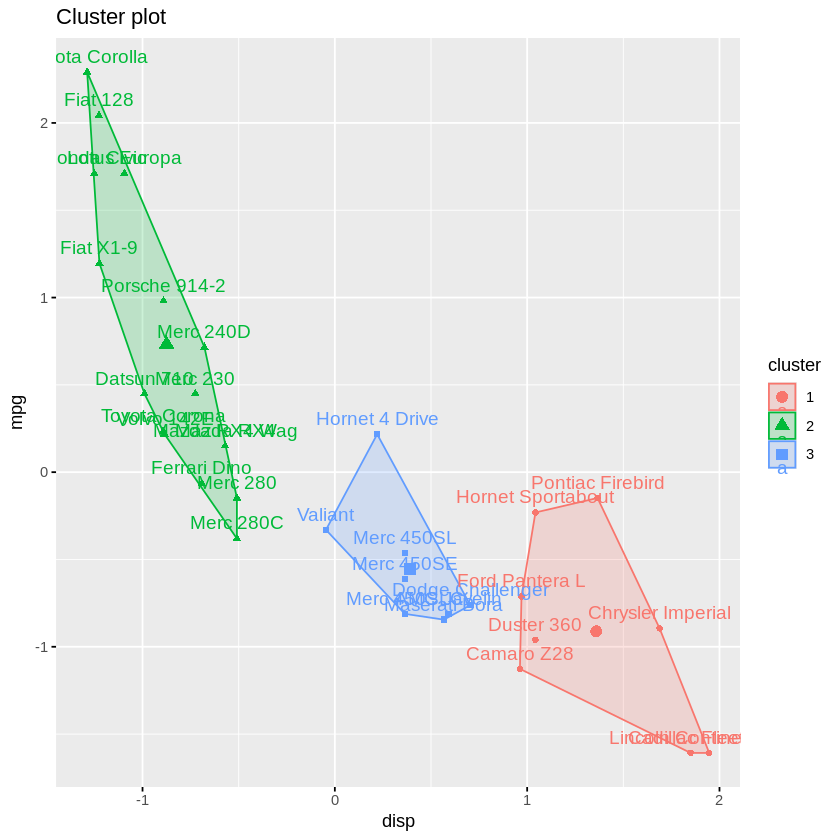

In [ ]:
set.seed(24)
dados=mtcars %>% select(disp,mpg)
kdados=dados %>% kmeans(centers = 3, nstart = 10)
# Visualizar os clusters utilizando factoextra
fviz_cluster(kdados, data = dados)

Uma aplicação interrante do kmeans é em imagens para agrupar pelas cores, lembrando que as cores são combinação do vermelho,verde e azul (rgb)(1:255)

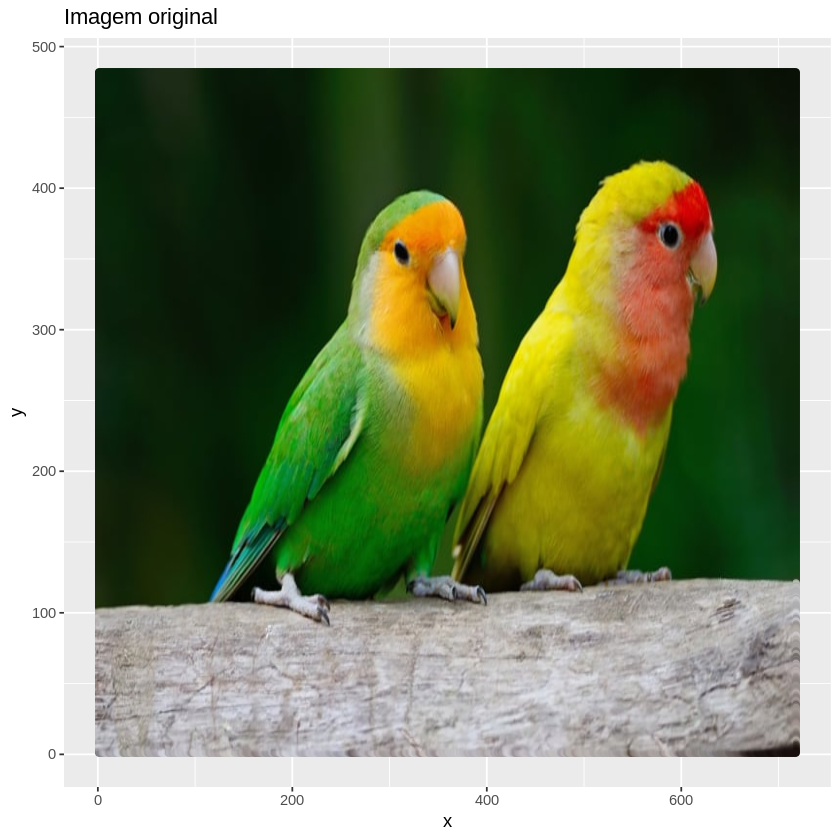

In [ ]:
# Carregar pacotes necessários
#install.packages("jpeg")
library(jpeg)
library(ggplot2)

# Carregar a imagem JPEG
img = readJPEG("/content/bico-de-passarinho-2.jpg") # Substitua pelo caminho da sua imagem
imgDm = dim(img) # dimensões da imagem

# passar a imagem (raster) para um dataframe
imgRGB = data.frame(
  x = rep(1:imgDm[2], each = imgDm[1]), # como coordenadas
  y = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(img[,,1]),
  G = as.vector(img[,,2]),
  B = as.vector(img[,,3])
  )

# grafico
ggplot(data = imgRGB, aes(x = x, y = y)) +
  geom_point(colour = rgb(imgRGB[c("R", "G", "B")])) +
  labs(title = "Imagem original")


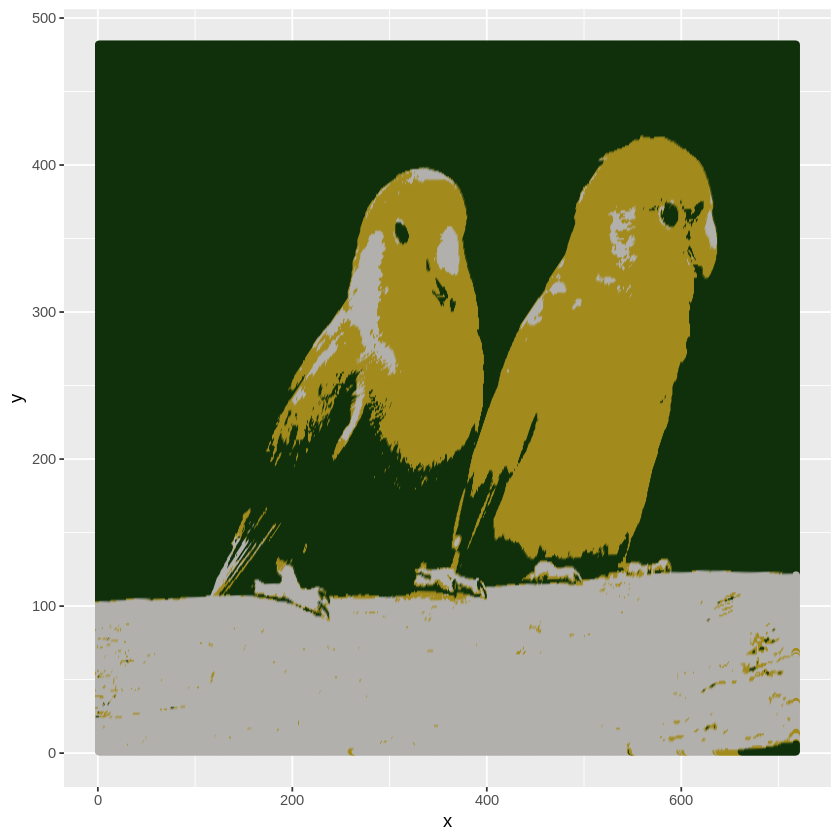

In [ ]:
kClusters <- 3
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters) # utilizar apenas as cores, não a localização
kColours <- rgb(kMeans$centers[kMeans$cluster,])# defino as novas cores

ggplot(data = imgRGB, aes(x = x, y = y)) +
  geom_point(colour = kColours) +
  labs("k-Means 3")